In [1]:
import sys
sys.path.append("/Users/ishimiwataru/Downloads/DNN_code_colab_lesson_1_2")
sys.path.append("/Users/ishimiwataru/Downloads/DNN_code_colab_lesson_1_2/lesson_2")

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.26
                : 10. 正答率(テスト) = 0.1974
Generation: 20. 正答率(トレーニング) = 0.30666666666666664
                : 20. 正答率(テスト) = 0.238
Generation: 30. 正答率(トレーニング) = 0.36333333333333334
                : 30. 正答率(テスト) = 0.2755
Generation: 40. 正答率(トレーニング) = 0.4166666666666667
                : 40. 正答率(テスト) = 0.3074
Generation: 50. 正答率(トレーニング) = 0.42333333333333334
                : 50. 正答率(テスト) = 0.3276
Generation: 60. 正答率(トレーニング) = 0.48
                : 60. 正答率(テスト) = 0.3584
Generation: 70. 正答率(トレーニング) = 0.5466666666666666
                : 70. 正答率(テスト) = 0.3934
Generation: 80. 正答率(トレーニング) = 0.6066666666666667
                : 80. 正答率(テスト) = 0.4458
Generation: 90. 正答率(トレーニング) = 0.68
                : 90. 正答率(テスト) = 0.5055
Generation: 100. 正答率(トレーニング) = 0.75
                : 100. 正答率(テスト) = 0.5541
Generation: 110. 正答率(トレーニング) = 0.7966666666666666
                : 110. 正答率(テスト) = 0.5783
Generation: 120. 正答率(トレーニング) = 0.8433333333333334
           

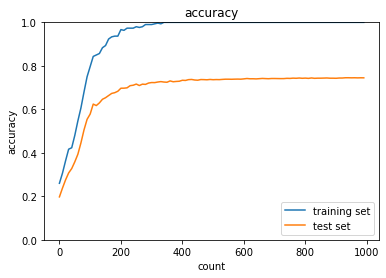

In [2]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# weight decay

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1312
Generation: 20. 正答率(トレーニング) = 0.18
                : 20. 正答率(テスト) = 0.1521
Generation: 30. 正答率(トレーニング) = 0.26
                : 30. 正答率(テスト) = 0.1987
Generation: 40. 正答率(トレーニング) = 0.33666666666666667
                : 40. 正答率(テスト) = 0.236
Generation: 50. 正答率(トレーニング) = 0.41
                : 50. 正答率(テスト) = 0.2899
Generation: 60. 正答率(トレーニング) = 0.44666666666666666
                : 60. 正答率(テスト) = 0.3477
Generation: 70. 正答率(トレーニング) = 0.4633333333333333
                : 70. 正答率(テスト) = 0.3663
Generation: 80. 正答率(トレーニング) = 0.5266666666666666
                : 80. 正答率(テスト) = 0.404
Generation: 90. 正答率(トレーニング) = 0.5566666666666666
                : 90. 正答率(テスト) = 0.4345
Generation: 100. 正答率(トレーニング) = 0.5933333333333334
                : 100. 正答率(テスト) = 0.469
Generation: 110. 正答率(トレーニング) = 0.6066666666666667
                : 110. 正答率(テスト) = 0.4829
Generation: 120. 正答率(トレーニング) = 0.6066666666666667
              

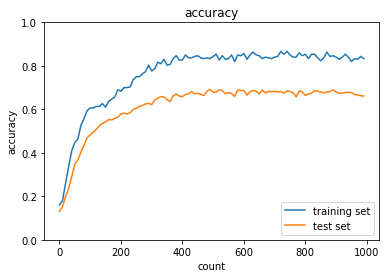

In [3]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.43
                : 10. 正答率(テスト) = 0.2928
Generation: 20. 正答率(トレーニング) = 0.45
                : 20. 正答率(テスト) = 0.372
Generation: 30. 正答率(トレーニング) = 0.5766666666666667
                : 30. 正答率(テスト) = 0.4714
Generation: 40. 正答率(トレーニング) = 0.76
                : 40. 正答率(テスト) = 0.6288
Generation: 50. 正答率(トレーニング) = 0.8033333333333333
                : 50. 正答率(テスト) = 0.6105
Generation: 60. 正答率(トレーニング) = 0.9
                : 60. 正答率(テスト) = 0.7145
Generation: 70. 正答率(トレーニング) = 0.88
                : 70. 正答率(テスト) = 0.6946
Generation: 80. 正答率(トレーニング) = 0.8966666666666666
                : 80. 正答率(テスト) = 0.6854
Generation: 90. 正答率(トレーニング) = 0.7233333333333334
                : 90. 正答率(テスト) = 0.5523
Generation: 100. 正答率(トレーニング) = 0.86
                : 100. 正答率(テスト) = 0.6499
Generation: 110. 正答率(トレーニング) = 0.75
                : 110. 正答率(テスト) = 0.5835
Generation: 120. 正答率(トレーニング) = 0.54
                : 120. 正答率(テスト) = 0.4256
Generation: 130. 正答率(トレーニング) =

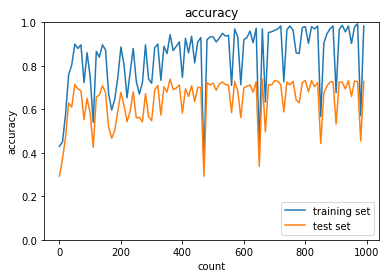

In [4]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# TRY weight_decay_lambdaの値を変更して正則化の強さを確認しよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10666666666666667
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1001
Generation: 30. 正答率(トレーニング) = 0.10666666666666667
                : 30. 正答率(テスト) = 0.0982
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 

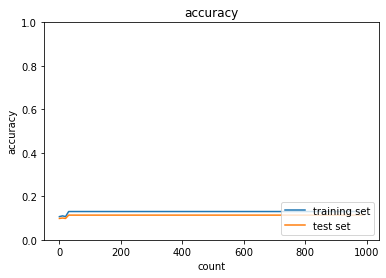

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.5
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

正則化を強くしすぎると、表現力が落ち、全く学習が進まなくなる。

# dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1177
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1479
Generation: 30. 正答率(トレーニング) = 0.19
                : 30. 正答率(テスト) = 0.1672
Generation: 40. 正答率(トレーニング) = 0.21333333333333335
                : 40. 正答率(テスト) = 0.1877
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.1882
Generation: 60. 正答率(トレーニング) = 0.21333333333333335
                : 60. 正答率(テスト) = 0.1811
Generation: 70. 正答率(トレーニング) = 0.21
                : 70. 正答率(テスト) = 0.1744
Generation: 80. 正答率(トレーニング) = 0.19666666666666666
                : 80. 正答率(テスト) = 0.1598
Generation: 90. 正答率(トレーニング) = 0.16
                : 90. 正答率(テスト) = 0.1267
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレー

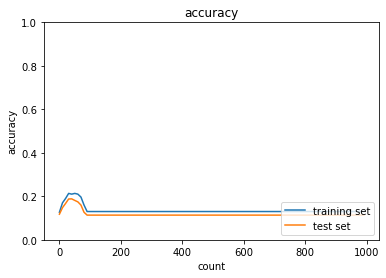

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# TRY１ dropout_ratioの値を変更してみよう
# TRY２ optimmizerとdropout_ratioの値を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1229
Generation: 20. 正答率(トレーニング) = 0.15666666666666668
                : 20. 正答率(テスト) = 0.1308
Generation: 30. 正答率(トレーニング) = 0.16666666666666666
                : 30. 正答率(テスト) = 0.1378
Generation: 40. 正答率(トレーニング) = 0.2
                : 40. 正答率(テスト) = 0.1551
Generation: 50. 正答率(トレーニング) = 0.22666666666666666
                : 50. 正答率(テスト) = 0.1851
Generation: 60. 正答率(トレーニング) = 0.24666666666666667
                : 60. 正答率(テスト) = 0.2008
Generation: 70. 正答率(トレーニング) = 0.24333333333333335
                : 70. 正答率(テスト) = 0.1872
Generation: 80. 正答率(トレーニング) = 0.16666666666666666
                : 80. 正答率(テスト) = 0.1425
Generation: 90. 正答率(トレーニング) = 0.13666666666666666
                : 90. 正答率(テスト) = 0.1203
Generation: 100. 正答率(トレーニング) = 0.13333333333333333
                : 100. 正答率(テスト) = 0.1136
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
      

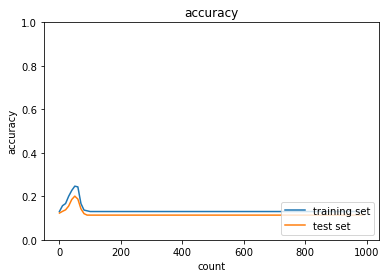

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.05
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10666666666666667
                : 10. 正答率(テスト) = 0.109
Generation: 20. 正答率(トレーニング) = 0.18
                : 20. 正答率(テスト) = 0.1502
Generation: 30. 正答率(トレーニング) = 0.17666666666666667
                : 30. 正答率(テスト) = 0.1607
Generation: 40. 正答率(トレーニング) = 0.13333333333333333
                : 40. 正答率(テスト) = 0.1268
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
    

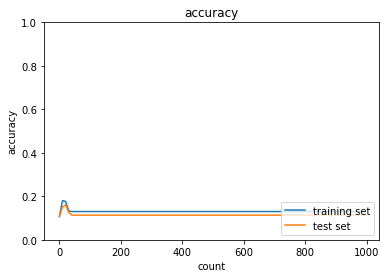

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.25
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, activation='relu', weight_init_std='He',
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
#optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()